# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Create a Dataframe for city info
weather_df = pd.DataFrame({"City":cities})
weather_df['Max Temp (F)'] = ''
weather_df['Humidity (%)'] = ''
weather_df['Cloudiness (%)'] = ''
weather_df['Wind Speed (mph)'] = ''
weather_df['Latitude'] = ''
weather_df['Longitude'] = ''
weather_df['Country'] = ''
# Set variables / lists
url = "https://api.openweathermap.org/data/2.5/weather?q="
api_key = "&appid=" + weather_api_key
measure = '&units=imperial'
city_list = []
max_t = []
humid = []
cloud = []
wind = []
lat = []
lng = []
country = []
row = 1
# for loop for all city data
for city in cities:
    print(f'Processing Record {row}, the city of {city}')
    query_url = f'{url}{city}{api_key}{measure}'
    row += 1
    try:
        # extra ct the results from the api and add to lists
        response = requests.get(query_url).json()
        city_list.append(response['name'])
        max_t.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        country.append(response['sys']['country'])
    except:
        print("City not found. Skipping...")
  

Processing Record 1, the city of medvezhyegorsk
Processing Record 2, the city of nemuro
Processing Record 3, the city of jamestown
Processing Record 4, the city of dikson
Processing Record 5, the city of meulaboh
Processing Record 6, the city of bolshoy uluy
City not found. Skipping...
Processing Record 7, the city of reconquista
Processing Record 8, the city of mys shmidta
City not found. Skipping...
Processing Record 9, the city of belushya guba
City not found. Skipping...
Processing Record 10, the city of albany
Processing Record 11, the city of bluff
Processing Record 12, the city of ponta do sol
Processing Record 13, the city of saint-philippe
Processing Record 14, the city of atuona
Processing Record 15, the city of fabiansebestyen
Processing Record 16, the city of port alfred
Processing Record 17, the city of kuala krai
City not found. Skipping...
Processing Record 18, the city of puerto ayora
Processing Record 19, the city of rechitsy
Processing Record 20, the city of rikitea
P

City not found. Skipping...
Processing Record 177, the city of talnakh
Processing Record 178, the city of sao joao da barra
Processing Record 179, the city of valparaiso
Processing Record 180, the city of rawson
Processing Record 181, the city of bethel
Processing Record 182, the city of kazalinsk
City not found. Skipping...
Processing Record 183, the city of jizan
Processing Record 184, the city of pangobilian
Processing Record 185, the city of bulungu
Processing Record 186, the city of katsuura
Processing Record 187, the city of pangkalanbuun
Processing Record 188, the city of sliven
Processing Record 189, the city of mount isa
Processing Record 190, the city of cabo san lucas
Processing Record 191, the city of faanui
Processing Record 192, the city of saldanha
Processing Record 193, the city of varhaug
Processing Record 194, the city of galle
Processing Record 195, the city of sulangan
Processing Record 196, the city of flinders
Processing Record 197, the city of necochea
Processing

Processing Record 353, the city of pangnirtung
Processing Record 354, the city of genhe
Processing Record 355, the city of evanston
Processing Record 356, the city of eyemouth
Processing Record 357, the city of kudahuvadhoo
Processing Record 358, the city of virginia beach
Processing Record 359, the city of kondinskoye
Processing Record 360, the city of bathsheba
Processing Record 361, the city of sao filipe
Processing Record 362, the city of coihaique
Processing Record 363, the city of aklavik
Processing Record 364, the city of te anau
Processing Record 365, the city of ksenyevka
City not found. Skipping...
Processing Record 366, the city of marystown
Processing Record 367, the city of lorengau
Processing Record 368, the city of lebu
Processing Record 369, the city of ostersund
Processing Record 370, the city of sabha
Processing Record 371, the city of hitoyoshi
Processing Record 372, the city of bojnurd
Processing Record 373, the city of iacobeni
Processing Record 374, the city of la

Processing Record 530, the city of erenhot
Processing Record 531, the city of saint-augustin
Processing Record 532, the city of arrecife
Processing Record 533, the city of juifang
City not found. Skipping...
Processing Record 534, the city of wewak
Processing Record 535, the city of pochutla
Processing Record 536, the city of voi
Processing Record 537, the city of narayanpet
Processing Record 538, the city of nakamura
Processing Record 539, the city of front royal
Processing Record 540, the city of longlac
City not found. Skipping...
Processing Record 541, the city of mecca
Processing Record 542, the city of bubaque
Processing Record 543, the city of poum
Processing Record 544, the city of trzebiatow
Processing Record 545, the city of port keats
Processing Record 546, the city of sturgis
Processing Record 547, the city of vernon
Processing Record 548, the city of ubauro
Processing Record 549, the city of brownwood
Processing Record 550, the city of mezen
Processing Record 551, the city

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Convert raw data to dataframe.
city_weather_df = pd.DataFrame({
    "City": city_list,
    "Cloudiness": cloud,
    "Country": country,
    "Humidity": humid,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": max_t,
    "Wind Speed": wind
})

city_weather_df.to_csv("../output_data/cities.csv", index=False, header=True)

city_weather_df.head()

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Medvezh'yegorsk,52,RU,90,62.9167,34.4667,-11.38,2.15
1,Nemuro,75,JP,86,43.3236,145.5750,17.60,5.75
2,Jamestown,90,US,73,42.0970,-79.2353,19.99,5.75
3,Dikson,29,RU,88,73.5069,80.5464,-21.62,7.94
4,Meulaboh,87,ID,89,4.1363,96.1285,76.51,4.18


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
humidity_100 = city_weather_df[city_weather_df['Humidity'] > 100]

if len(humidity_100['City']) == 0:
    print('No cities have humidity greater than 100 %')

No cities have humidity greater than 100 %


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

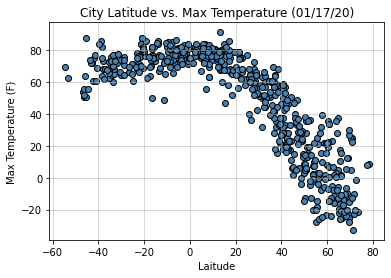

In [13]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(city_weather_df["Latitude"], city_weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

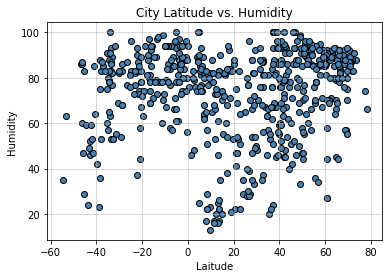

In [15]:
# Create Latitude vs. Humidty Plot scatter plot
plt.scatter(city_weather_df["Latitude"], city_weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

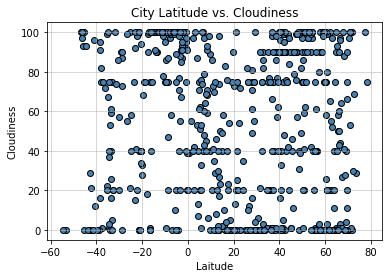

In [16]:
# Create Latitude vs. Humidty Plot scatter plot
plt.scatter(city_weather_df["Latitude"], city_weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

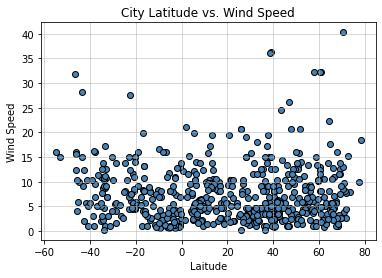

In [17]:
# Create Latitude vs. Humidty Plot scatter plot
plt.scatter(city_weather_df["Latitude"], city_weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Wind Speed")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [24]:
#Breakdown into north and south hemispheres

north = city_weather_df[city_weather_df['Latitude'] >= 0]
south = city_weather_df[city_weather_df['Latitude'] < 0]

north.head()


,City,Cloudiness,Country,Humidity,Latitude,Longitude,Max Temp,Wind Speed
5,Reconquista,90,AR,54,-29.1500,-59.6500,74.48,5.44
7,Bluff,100,NZ,86,-46.6000,168.3333,53.58,31.85
9,Saint-Philippe,0,RE,73,-21.3585,55.7679,77.00,5.75
10,Atuona,1,PF,79,-9.8000,-139.0333,78.91,16.62
12,Port Alfred,16,ZA,93,-33.5906,26.8910,73.00,8.75


In [25]:
north = city_weather_df[city_weather_df['Latitude'] >= 0]
south = city_weather_df[city_weather_df['Latitude'] < 0]

south.head()


,City,Cloudiness,Country,Humidity,Latitude,Longitude,Max Temp,Wind Speed
5,Reconquista,90,AR,54,-29.1500,-59.6500,74.48,5.44
7,Bluff,100,NZ,86,-46.6000,168.3333,53.58,31.85
9,Saint-Philippe,0,RE,73,-21.3585,55.7679,77.00,5.75
10,Atuona,1,PF,79,-9.8000,-139.0333,78.91,16.62
12,Port Alfred,16,ZA,93,-33.5906,26.8910,73.00,8.75


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Slope is: -1.46, rvalue is: -0.9


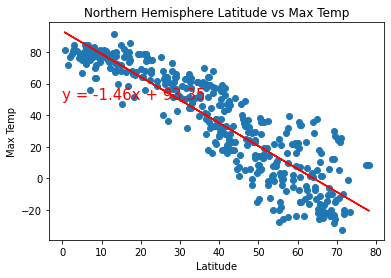

In [40]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north['Latitude'],north['Max Temp'])

print(f'Slope is: {round(slope,2)}, rvalue is: {round(rvalue,2)}')

regress_values = north['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(north['Latitude'] ,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.scatter(north['Latitude'],north['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere Latitude vs Max Temp')
plt.savefig('Northern Hemisphere Latitude vs Max Temp.png') #has to be before plt.show()
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Slope: 0.26, rvalue: 0.46


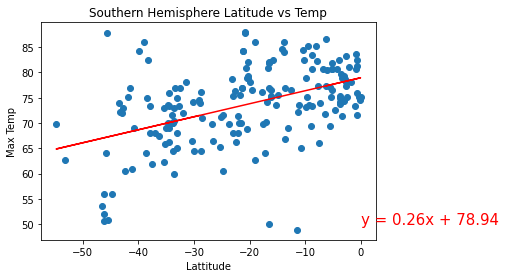

In [39]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south['Latitude'],south['Max Temp'])

print(f'Slope: {round(slope,2)}, rvalue: {round(rvalue,2)}')

regress_values = south['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(south['Latitude'] ,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.scatter(south['Latitude'],south['Max Temp'])
plt.xlabel('Lattitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere Latitude vs Temp')
plt.savefig('Southern Hemisphere Latitude vs Temp')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Slope is: 0.32, rvalue is: 0.31


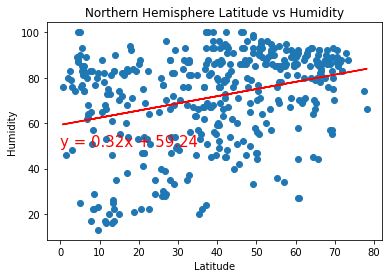

In [38]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north['Latitude'],north['Humidity'])

print(f'Slope is: {round(slope,2)}, rvalue is: {round(rvalue,2)}')

regress_values = north['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(north['Latitude'] ,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.scatter(north['Latitude'],north['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere Latitude vs Humidity')
plt.savefig('Northern Hemisphere Latitude vs Humidity.png') #has to be before plt.show()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Slope: 0.47, rvalue: 0.42


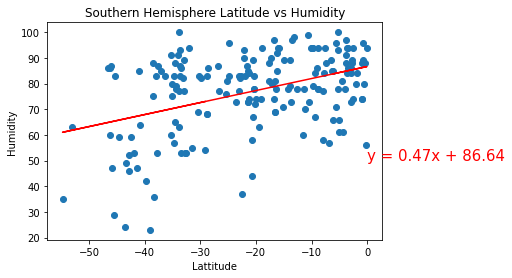

In [37]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south['Latitude'],south['Humidity'])

print(f'Slope: {round(slope,2)}, rvalue: {round(rvalue,2)}')

regress_values = south['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(south['Latitude'] ,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.scatter(south['Latitude'],south['Humidity'])
plt.xlabel('Lattitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere Latitude vs Humidity')
plt.savefig('Southern Hemisphere Latitude vs Humidity')
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Slope is: 0.17, rvalue is: 0.09


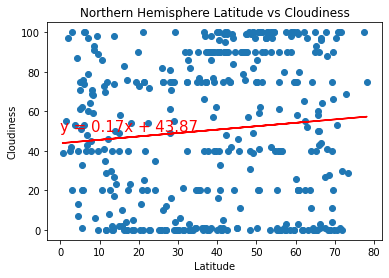

In [36]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north['Latitude'],north['Cloudiness'])

print(f'Slope is: {round(slope,2)}, rvalue is: {round(rvalue,2)}')

regress_values = north['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(north['Latitude'] ,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.scatter(north['Latitude'],north['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere Latitude vs Cloudiness')
plt.savefig('Northern Hemisphere Latitude vs Cloudiness.png') #has to be before plt.show()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Slope: 0.8, rvalue: 0.3


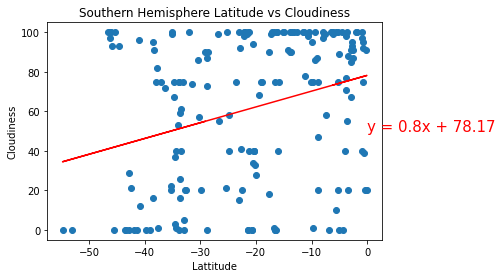

In [35]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south['Latitude'],south['Cloudiness'])

print(f'Slope: {round(slope,2)}, rvalue: {round(rvalue,2)}')

regress_values = south['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(south['Latitude'] ,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.scatter(south['Latitude'],south['Cloudiness'])
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Latitude vs Cloudiness')
plt.savefig('Southern Hemisphere Latitude vs Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Slope is: 0.01, rvalue is: 0.04


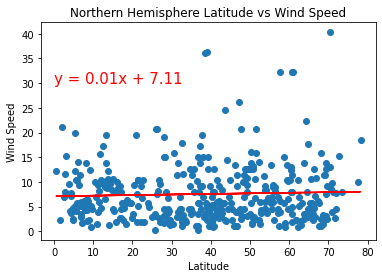

In [44]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north['Latitude'],north['Wind Speed'])

print(f'Slope is: {round(slope,2)}, rvalue is: {round(rvalue,2)}')

regress_values = north['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(north['Latitude'] ,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")

plt.scatter(north['Latitude'],north['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere Latitude vs Wind Speed')
plt.savefig('Northern Hemisphere Latitude vs Wind Speed.png') #has to be before plt.show()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Slope: -0.13, rvalue: -0.34


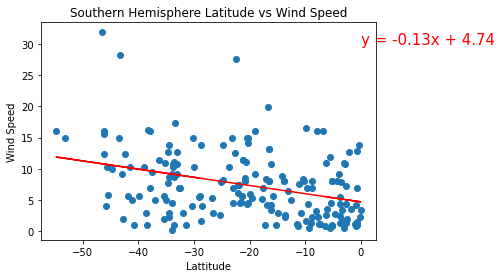

In [43]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south['Latitude'],south['Wind Speed'])

print(f'Slope: {round(slope,2)}, rvalue: {round(rvalue,2)}')

regress_values = south['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(south['Latitude'] ,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")

plt.scatter(south['Latitude'],south['Wind Speed'])
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere Latitude vs Wind Speed')
plt.savefig('Southern Hemisphere Latitude vs Wind Speed')
plt.show()